In [809]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [810]:
train = pd.read_csv('sample_submission.csv')

<Axes: >

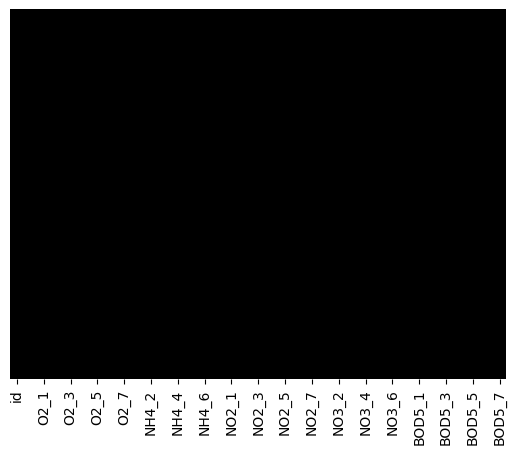

In [811]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,linecolor='black',linewidth=0.1)

In [812]:
train.head()

id  target    O2_1   O2_2   O2_3   O2_4   O2_5   O2_6  O2_7  NH4_1  ...  \
0   0    8.59   7.500   9.00  9.545  9.265  8.110   8.43  7.15  0.180  ...   
1   1    9.10  13.533  40.90  8.770  9.265  6.015  10.07  7.15  1.107  ...   
2   2    8.21   3.710   5.42  8.770  9.265  4.550  10.07  7.15  0.020  ...   
3   3    8.39   8.700   8.10  9.500  9.200  5.200   8.67  6.67  0.280  ...   
4   4    8.07   8.050   8.65  7.960  9.265  3.290  10.07  7.15  0.360  ...   

   NO3_5  NO3_6  NO3_7  BOD5_1  BOD5_2  BOD5_3  BOD5_4  BOD5_5  BOD5_6  BOD5_7  
0   4.95  1.730  1.800   4.800    3.15  10.665  10.465  16.645    5.75   10.37  
1  20.05  9.530  7.695   4.550    6.95   2.040   5.200   5.725    2.95    2.23  
2   4.58  3.025  3.960   4.935    4.95   4.725   6.075   6.750    3.50    3.17  
3   8.45  2.070  1.730   6.300    4.70   3.500   6.200   8.670    2.90    7.37  
4   2.02  1.730  0.760   4.800    4.97   3.950   2.800   8.400    3.50    3.90  

[5 rows x 37 columns]

In [813]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3500 entries, 0 to 3499
Data columns (total 37 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      3500 non-null   int64  
 1   target  3500 non-null   float64
 2   O2_1    3500 non-null   float64
 3   O2_2    3500 non-null   float64
 4   O2_3    3500 non-null   float64
 5   O2_4    3500 non-null   float64
 6   O2_5    3500 non-null   float64
 7   O2_6    3500 non-null   float64
 8   O2_7    3500 non-null   float64
 9   NH4_1   3500 non-null   float64
 10  NH4_2   3500 non-null   float64
 11  NH4_3   3500 non-null   float64
 12  NH4_4   3500 non-null   float64
 13  NH4_5   3500 non-null   float64
 14  NH4_6   3500 non-null   float64
 15  NH4_7   3500 non-null   float64
 16  NO2_1   3500 non-null   float64
 17  NO2_2   3500 non-null   float64
 18  NO2_3   3500 non-null   float64
 19  NO2_4   3500 non-null   float64
 20  NO2_5   3500 non-null   float64
 21  NO2_6   3500 non-null   float64
 22  

In [814]:
import missingno as msno

<Axes: >

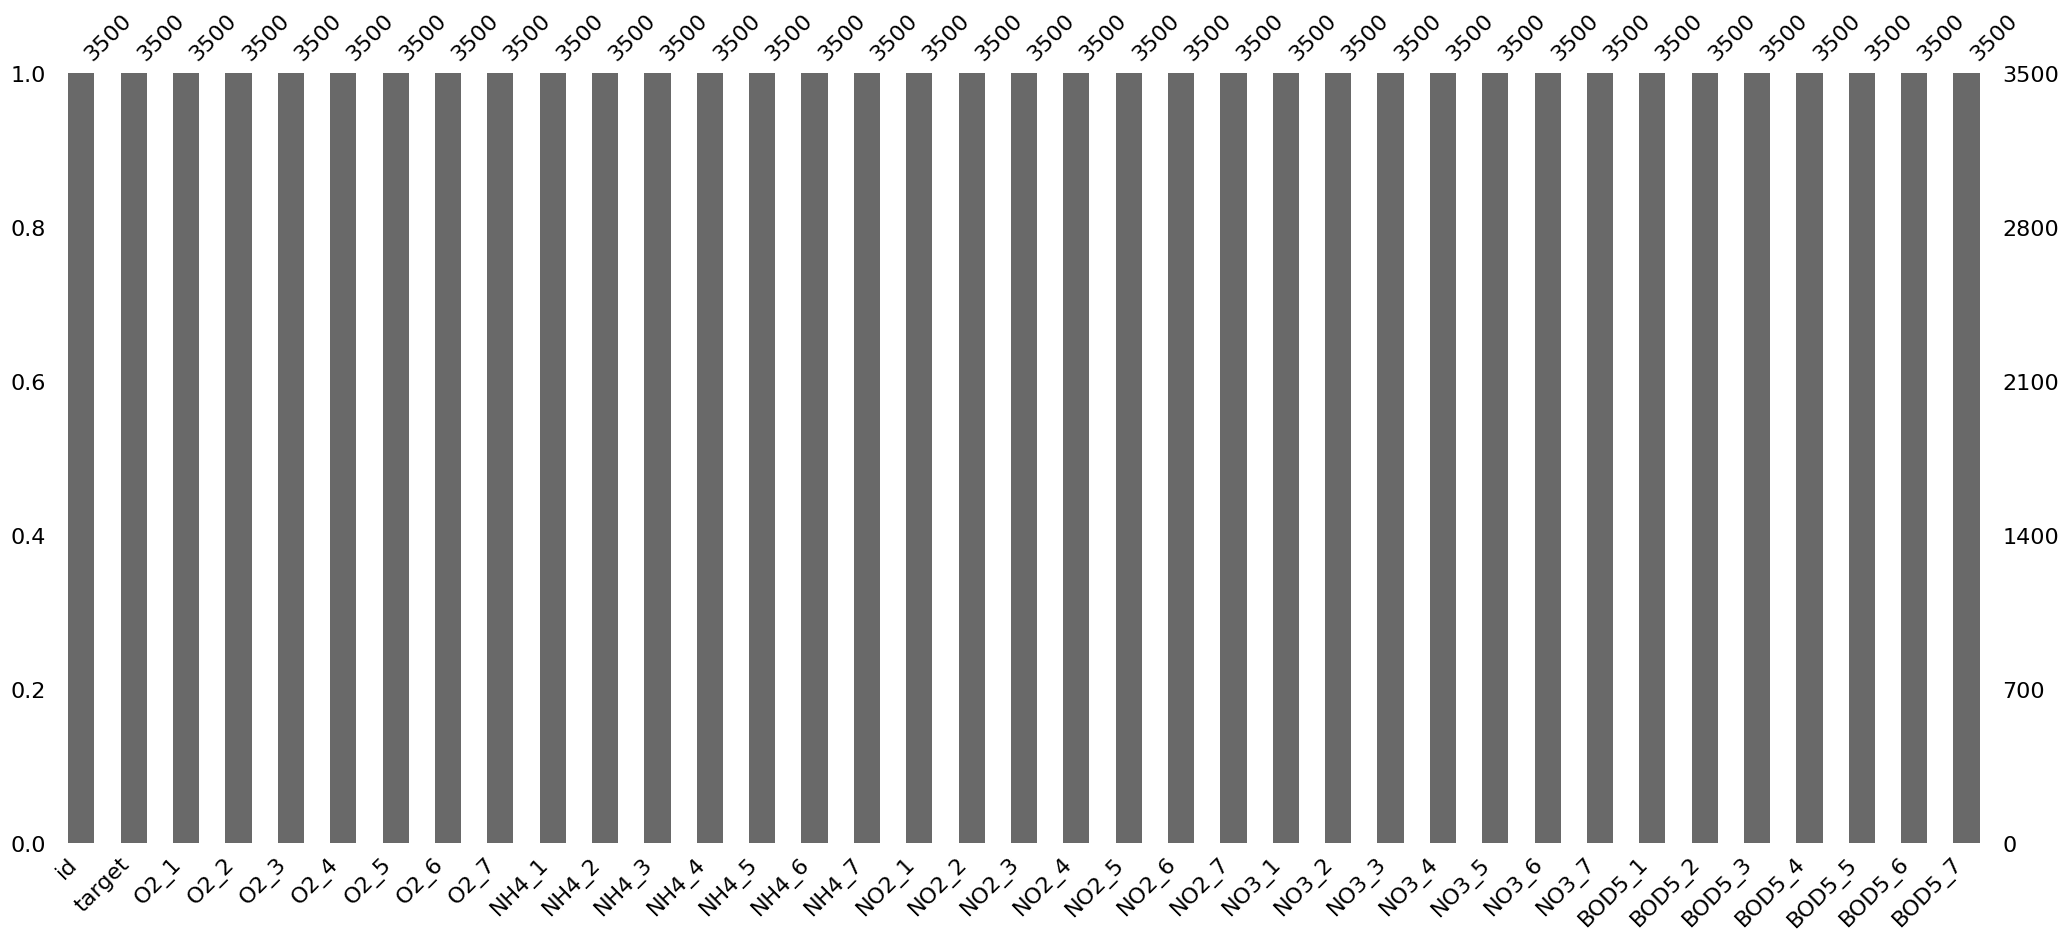

In [815]:
msno.bar(train)

In [816]:
train.duplicated().sum()

0

In [817]:
def detect_outliers(data, threshold=3):
    z_scores = np.abs((train['target']-np.mean(train['target']))/np.std(train['target']))
    outliers = z_scores > threshold
    return outliers

In [818]:
outliers = detect_outliers(train['target'])
print(np.where(outliers)[0])

[  49  101  177  279  282  291  316  317  336  379  407  451  465  469
  484  536  642  797  831 1055 1191 1192 1194 1295 1530 1553 1665 1743
 1866 1876 1934 1961 1979 2082 2160 2365 2477 2624 2662 2691 2708 3110
 3326 3346 3348 3366 3408]


In [819]:
train = train.mask((train < 0),np.nan)

In [820]:
train.isnull().sum()

id        0
target    0
O2_1      0
O2_2      0
O2_3      0
O2_4      0
O2_5      0
O2_6      0
O2_7      0
NH4_1     0
NH4_2     0
NH4_3     0
NH4_4     0
NH4_5     0
NH4_6     0
NH4_7     0
NO2_1     0
NO2_2     0
NO2_3     0
NO2_4     1
NO2_5     0
NO2_6     0
NO2_7     0
NO3_1     0
NO3_2     0
NO3_3     0
NO3_4     0
NO3_5     0
NO3_6     0
NO3_7     0
BOD5_1    0
BOD5_2    0
BOD5_3    0
BOD5_4    0
BOD5_5    0
BOD5_6    0
BOD5_7    0
dtype: int64

In [821]:
from sklearn.impute import KNNImputer

In [822]:
training = train[['id','target','O2_1','O2_2','NH4_6','NO2_2','O2_4']]

In [823]:
imputer = KNNImputer(n_neighbors=10)
imputed_df = pd.DataFrame(imputer.fit_transform(training),columns=training.columns)

In [824]:
imputed_df.isna().sum()

id        0
target    0
O2_1      0
O2_2      0
NH4_6     0
NO2_2     0
O2_4      0
dtype: int64

In [825]:
from sklearn.preprocessing import StandardScaler, Normalizer

In [826]:
# scaler = StandardScaler()
# scaled_df = pd.DataFrame(scaler.fit_transform(imputed_df),columns=train.columns)

# normalizer = Normalizer()
# normalized_df = pd.DataFrame(normalizer.fit_transform(imputed_df),columns=train.columns)

In [827]:
X = imputed_df.drop(['id','target'],axis=1)
y = imputed_df['target']

In [828]:
from sklearn.model_selection import train_test_split

In [829]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [830]:
from sklearn.ensemble import RandomForestRegressor

In [831]:
rf = RandomForestRegressor(n_estimators=1000,max_depth=7,n_jobs=-1,random_state=42)

In [832]:
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=7, n_estimators=1000, n_jobs=-1,
                      random_state=42)

In [833]:
# feature_importance = pd.DataFrame(rf.fit(X,y).feature_importances_,index = list(X))

In [834]:
# print(feature_importance.sort_values(by=0,ascending=False))

In [835]:
# plt.figure(figsize = (10, 10), dpi = 100)

# sns.barplot(feature_importance.sort_values(by = 0, ascending = False).T, palette = 'viridis', orient = 'h')
# plt.title('Feature Importance', weight = 'bold', size = 20)
# plt.show()

In [836]:
y_hat = rf.predict(X_test)

In [837]:
from sklearn.metrics import mean_squared_error

In [838]:
rmse = mean_squared_error(y_test,y_hat,squared=False)

In [839]:
print(rmse)

1.1331250355529088


In [840]:
submission = pd.DataFrame(train[['id','target','O2_1','O2_2','NH4_6','NO2_2','O2_4']], columns=train.columns).fillna(0)

In [841]:
submission.head()

id  target    O2_1   O2_2  O2_3   O2_4  O2_5  O2_6  O2_7  NH4_1  ...  \
0   0    8.59   7.500   9.00   0.0  9.265   0.0   0.0   0.0    0.0  ...   
1   1    9.10  13.533  40.90   0.0  9.265   0.0   0.0   0.0    0.0  ...   
2   2    8.21   3.710   5.42   0.0  9.265   0.0   0.0   0.0    0.0  ...   
3   3    8.39   8.700   8.10   0.0  9.200   0.0   0.0   0.0    0.0  ...   
4   4    8.07   8.050   8.65   0.0  9.265   0.0   0.0   0.0    0.0  ...   

   NO3_5  NO3_6  NO3_7  BOD5_1  BOD5_2  BOD5_3  BOD5_4  BOD5_5  BOD5_6  BOD5_7  
0    0.0    0.0    0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0  
1    0.0    0.0    0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0  
2    0.0    0.0    0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0  
3    0.0    0.0    0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0  
4    0.0    0.0    0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0  

[5 rows x 37 columns]

In [842]:
submission.isna().sum()

id        0
target    0
O2_1      0
O2_2      0
O2_3      0
O2_4      0
O2_5      0
O2_6      0
O2_7      0
NH4_1     0
NH4_2     0
NH4_3     0
NH4_4     0
NH4_5     0
NH4_6     0
NH4_7     0
NO2_1     0
NO2_2     0
NO2_3     0
NO2_4     0
NO2_5     0
NO2_6     0
NO2_7     0
NO3_1     0
NO3_2     0
NO3_3     0
NO3_4     0
NO3_5     0
NO3_6     0
NO3_7     0
BOD5_1    0
BOD5_2    0
BOD5_3    0
BOD5_4    0
BOD5_5    0
BOD5_6    0
BOD5_7    0
dtype: int64

In [843]:
submission.to_csv('oxygen_data.csv',index=False)